In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


In [81]:
data_path = "./problem_one.csv"

# Data Acquisition: Read the CSV file into a Pandas DataFrame
data = pd.read_csv(data_path)

# Data Exploration: 
# View the first few rows to understand the data structure
data.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


In [82]:
# Get summary statistics for numerical columns
data.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [84]:
data = data.loc[(data != '-').all(axis=1)]

In [85]:
# Check for missing values
print(data.isnull().sum())

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


In [86]:
duplicate_count = data.duplicated().sum()

duplicate_count

0

In [87]:
# Data Preparation:
# Handle missing values (example: impute missing weights with the mean)
data["weight"] = data["weight"].fillna(data["weight"].mean())


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1487 non-null   int64  
 1   months_as_member  1487 non-null   int64  
 2   weight            1487 non-null   float64
 3   days_before       1487 non-null   object 
 4   day_of_week       1487 non-null   object 
 5   time              1487 non-null   object 
 6   category          1487 non-null   object 
 7   attended          1487 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 104.6+ KB


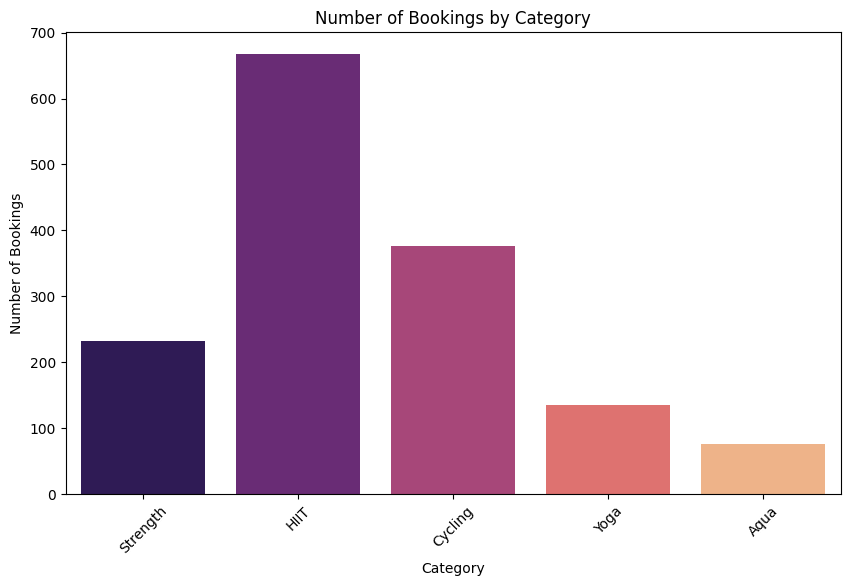

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='category', palette='magma')
plt.xlabel('Category')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Category')
plt.xticks(rotation=45)
plt.show()

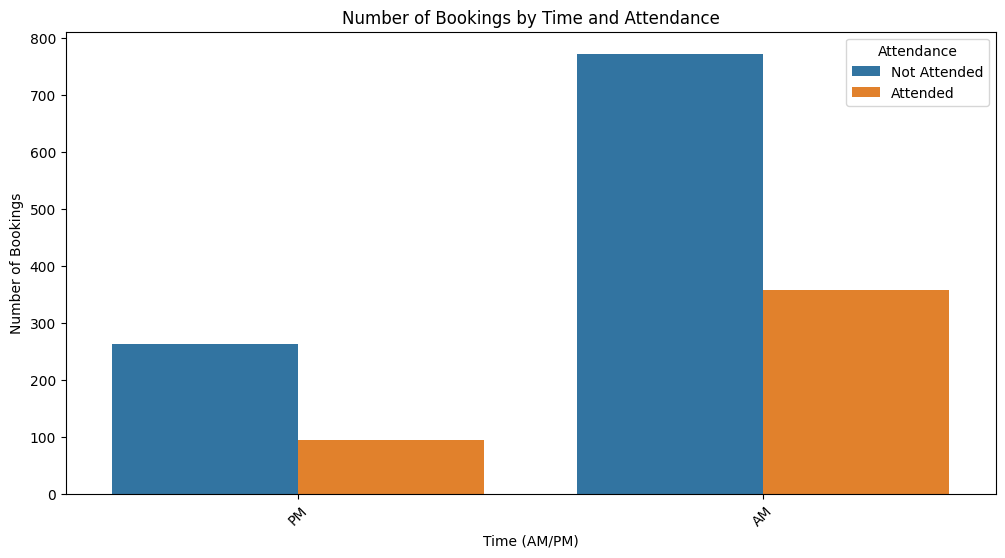

In [90]:
# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='time', hue='attended')
plt.xlabel('Time (AM/PM)')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Time and Attendance')
plt.legend(title='Attendance', labels=['Not Attended', 'Attended'])
plt.xticks(rotation=45)
plt.show()


In [91]:
for col in data.columns:
    unique_values = data[col].unique()
    print(f"{col}: {unique_values}")


booking_id: [   1    2    3 ... 1498 1499 1500]
months_as_member: [ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]
weight: [79.56 79.01 74.53 ... 87.38 68.64 94.39]
days_before: ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']
day_of_week: ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
time: ['PM' 'AM']
category: ['Strength' 'HIIT' 'Cycling' 'Yoga' 'Aqua']
attended: [0 1]


In [92]:
# Remove "days" from entries in the 'days_before' column and convert to numeric type
data['days_before'] = pd.to_numeric(data['days_before'].str.replace(' days', ''), errors='coerce')


In [93]:
# Replace values in the 'day_of_week' column
data['day_of_week'] = data['day_of_week'].replace({'Wednesday': 'Wed', 'Fri.': 'Fri', 'Monday': 'Mon'})


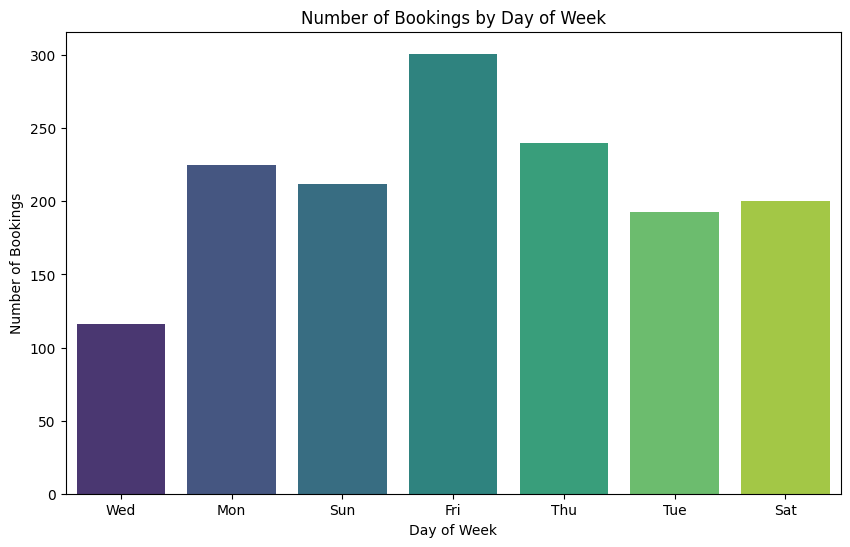

In [94]:
# Bar Chart for Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='day_of_week', palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Day of Week')
plt.show()

In [95]:
for col in data.columns:
    unique_values = data[col].unique()
    print(f"{col}: {unique_values}")


booking_id: [   1    2    3 ... 1498 1499 1500]
months_as_member: [ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]
weight: [79.56 79.01 74.53 ... 87.38 68.64 94.39]
days_before: [ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]
day_of_week: ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']
time: ['PM' 'AM']
category: ['Strength' 'HIIT' 'Cycling' 'Yoga' 'Aqua']
attended: [0 1]


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1487 non-null   int64  
 1   months_as_member  1487 non-null   int64  
 2   weight            1487 non-null   float64
 3   days_before       1487 non-null   int64  
 4   day_of_week       1487 non-null   object 
 5   time              1487 non-null   object 
 6   category          1487 non-null   object 
 7   attended          1487 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 104.6+ KB


In [97]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['day_of_week', 'time', 'category'])

# Drop the original categorical columns
data_encoded.drop(['booking_id'], axis=1, inplace=True)  # assuming booking_id is not relevant for prediction

# Display the encoded data
data_encoded.head()


,months_as_member,weight,days_before,attended,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,17,79.56,8,0,False,False,False,False,False,False,True,False,True,False,False,False,True,False
1,10,79.01,2,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False
2,16,74.53,14,0,False,False,False,True,False,False,False,True,False,False,False,False,True,False
3,5,86.12,10,0,True,False,False,False,False,False,False,True,False,False,True,False,False,False
4,15,69.29,8,0,False,False,False,False,True,False,False,True,False,False,False,True,False,False


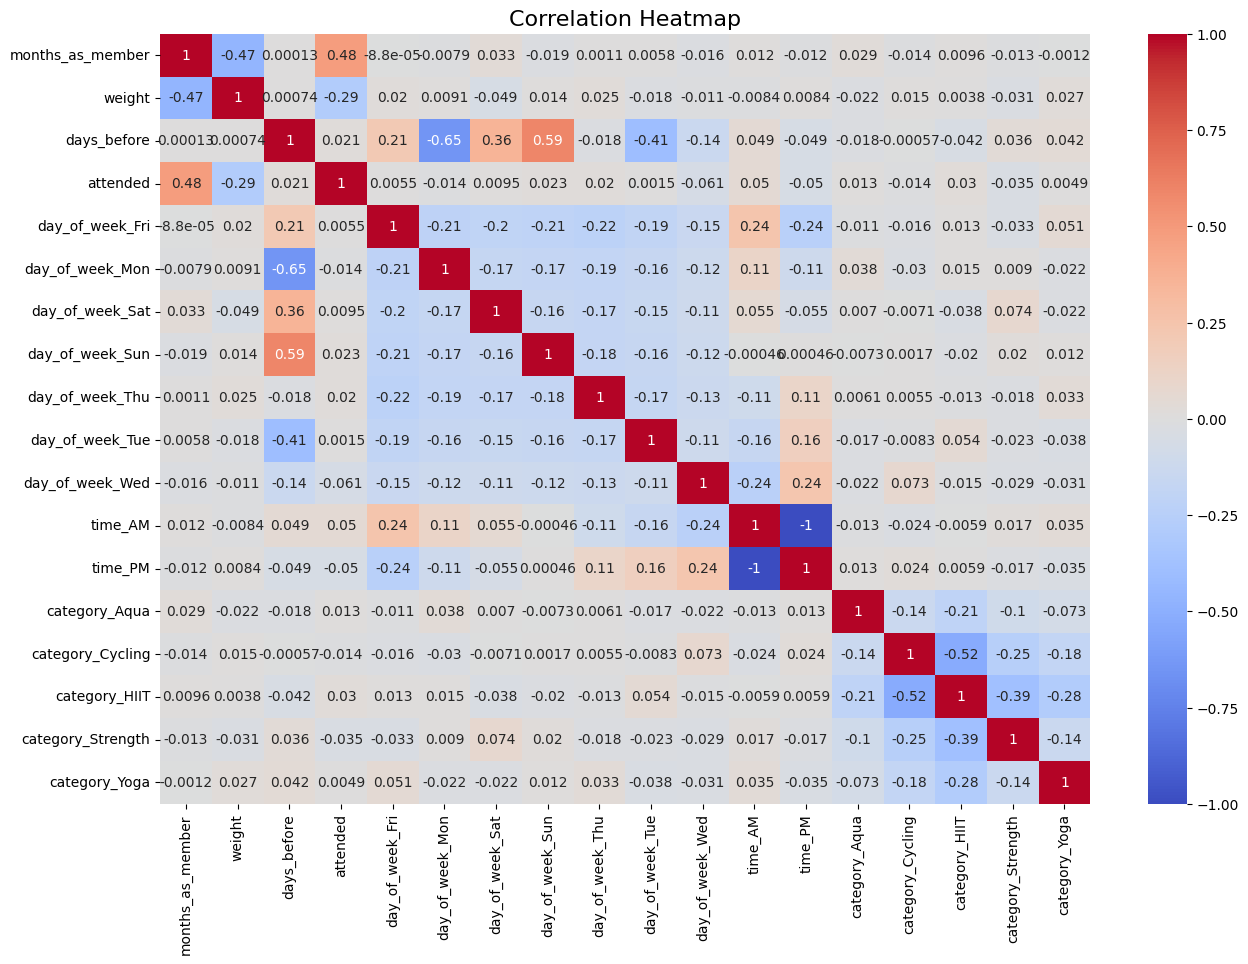

In [98]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [99]:
data = data_encoded
data.columns

Index(['months_as_member', 'weight', 'days_before', 'attended',
       'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Sat',
       'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue',
       'day_of_week_Wed', 'time_AM', 'time_PM', 'category_Aqua',
       'category_Cycling', 'category_HIIT', 'category_Strength',
       'category_Yoga'],
      dtype='object')

In [100]:
data.head()

,months_as_member,weight,days_before,attended,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,17,79.56,8,0,False,False,False,False,False,False,True,False,True,False,False,False,True,False
1,10,79.01,2,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False
2,16,74.53,14,0,False,False,False,True,False,False,False,True,False,False,False,False,True,False
3,5,86.12,10,0,True,False,False,False,False,False,False,True,False,False,True,False,False,False
4,15,69.29,8,0,False,False,False,False,True,False,False,True,False,False,False,True,False,False


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   months_as_member   1487 non-null   int64  
 1   weight             1487 non-null   float64
 2   days_before        1487 non-null   int64  
 3   attended           1487 non-null   int64  
 4   day_of_week_Fri    1487 non-null   bool   
 5   day_of_week_Mon    1487 non-null   bool   
 6   day_of_week_Sat    1487 non-null   bool   
 7   day_of_week_Sun    1487 non-null   bool   
 8   day_of_week_Thu    1487 non-null   bool   
 9   day_of_week_Tue    1487 non-null   bool   
 10  day_of_week_Wed    1487 non-null   bool   
 11  time_AM            1487 non-null   bool   
 12  time_PM            1487 non-null   bool   
 13  category_Aqua      1487 non-null   bool   
 14  category_Cycling   1487 non-null   bool   
 15  category_HIIT      1487 non-null   bool   
 16  category_Strength  1487 non-n

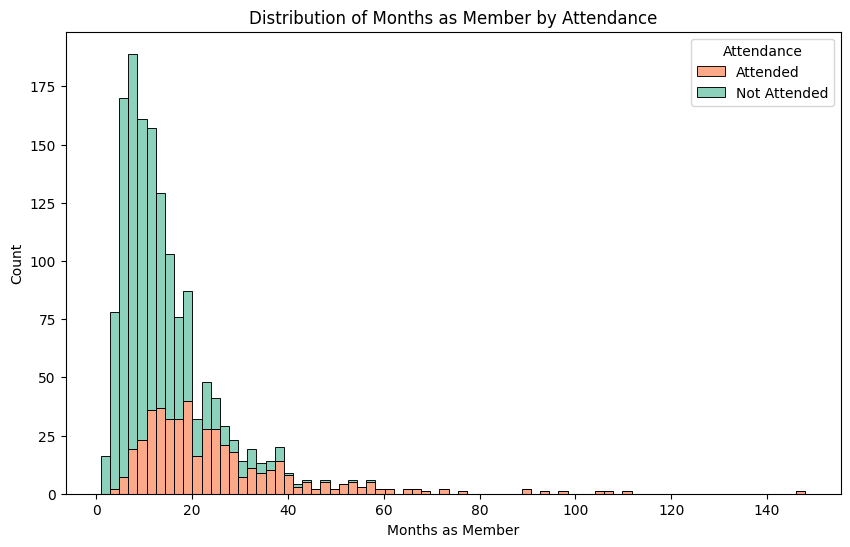

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Attendance Distribution by Months as Member
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='months_as_member', hue='attended', palette='Set2', multiple='stack')
plt.xlabel('Months as Member')
plt.ylabel('Count')
plt.title('Distribution of Months as Member by Attendance')
plt.legend(title='Attendance', labels=['Attended', 'Not Attended'], loc='upper right')
plt.show()


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data_encoded.drop('attended', axis=1)
y = data_encoded['attended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest Classifier in this example)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy:", accuracy)


RandomForestClassifier Accuracy: 0.7751677852348994


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model (Logistic Regression)
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.7651006711409396


In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the model (Decision Tree Classifier)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.6912751677852349
